## I. Basic Analysis:

In [ ]:
# Importing required libraries -

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind                     # T-test for independent samples
from scipy.stats import shapiro                       # Shapiro-Wilk’s test for Normality
from statsmodels.graphics.gofplots import qqplot      # QQ Plot for normality
from scipy.stats import levene                        # Levene's test for Equality of Variance
from scipy.stats import skew                          # Skewness
from scipy.stats import kurtosis                      # Kurtosis
from scipy.stats import f_oneway                      # One-way ANOVA
from scipy.stats import chi2_contingency              # Chi-square test of independence
from scipy.stats import kruskal                       # Kruskal-Wallis test

import warnings
warnings.simplefilter("ignore")

In [ ]:
# Loading the dataset -

df = pd.read_csv("/content/bike_sharing.txt")

In [ ]:
# First 5 rows of the datset

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Last 5 rows of the dataset

df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
# Shape of the dataset -

print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Number of rows : 10886
Number of columns : 12


- There are 10,886 rows and 12 columns in the dataset.

In [ ]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- No missing values: All columns have 10,886 non-null entries.

- datetime is object type: Needs conversion to datetime for time-based analysis (e.g., hour, weekday, month).

- Weather-related data: Includes temperature, humidity, and windspeed, likely to influence bike usage.

- Time-dependent data: season, holiday, workingday, and datetime will show strong seasonality and trends.

- Target variable: count is likely the dependent variable for prediction, and it's the sum of casual + registered.

In [ ]:
# Checking for null values -

df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


- There is no null values in any of the column of the dataset.

In [ ]:
# Checking for duplicate rows -

df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


- There is no duplicate row in the dataset.

In [ ]:
# Statistical summary

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## II. EDA

### Categorical columns
- Univariate Analysis
- Bivariate Analysis with respect to Count

In [ ]:
# Distribution of "season" column

season_counts = df["season"].value_counts().reset_index()
season_counts

,season,count
0,4,2734
1,2,2733
2,3,2733
3,1,2686


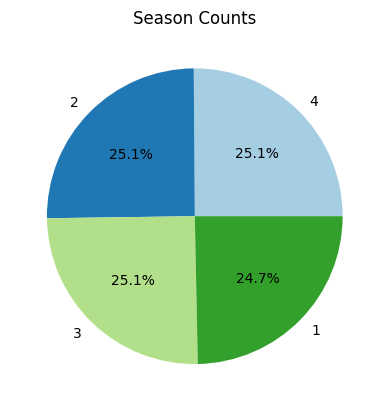

In [ ]:
plt.pie(
    season_counts["count"],
    labels = season_counts["season"],
    autopct = "%1.1f%%",
    colors = plt.cm.Paired.colors
)

plt.title("Season Counts")
plt.show()

- The counts across all seasons are very close to each other, ranging from 2686 to 2734. This suggests that the dataset is well-balanced across seasons.

In [ ]:
# Total number of bike rentals for each season

rental_per_season = df.groupby("season")["count"].sum().reset_index()
rental_per_season

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


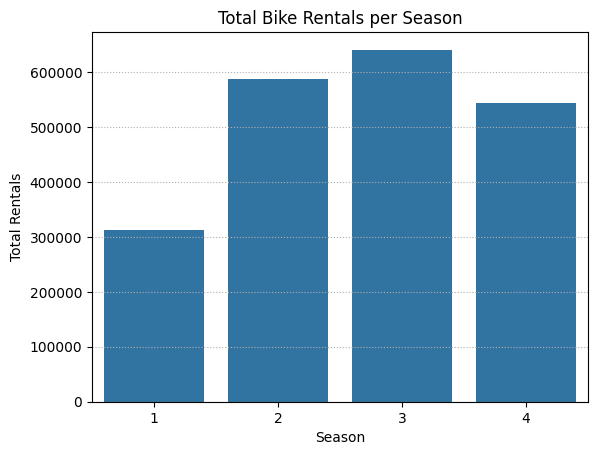

In [ ]:
sns.barplot(
    x = "season",
    y = "count",
    data = rental_per_season
)

plt.title("Total Bike Rentals per Season")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.grid(axis = "y", linestyle = ":")
plt.show()

- The Fall season accounts for the highest proportion of rides, representing approximately 31% of all records, indicating that most rentals occurred during this time.

- The Spring season has the lowest number of rentals, making it the least active season for rides.

In [ ]:
# Distribution of "holiday" column

holiday_counts = df["holiday"].value_counts().reset_index()
holiday_counts

,holiday,count
0,0,10575
1,1,311


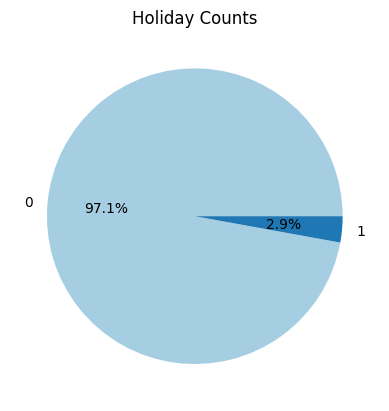

In [ ]:
plt.pie(
    holiday_counts["count"],
    labels = holiday_counts["holiday"],
    autopct = "%1.1f%%",
    colors = plt.cm.Paired.colors
)

plt.title("Holiday Counts")
plt.show()

- A vast majority (10,575 records or ~97.1%) of the rentals occurred on non-holidays.

In [ ]:
# Total Rentals by Holiday Status

rental_holiday = df.groupby("holiday")["count"].sum().reset_index()
rental_holiday

,holiday,count
0,0,2027668
1,1,57808


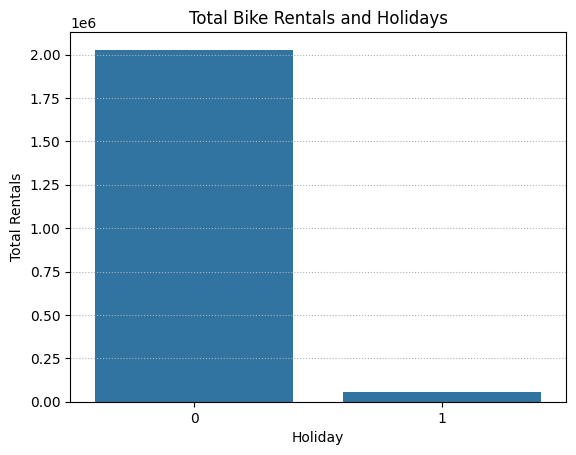

In [ ]:
sns.barplot(
    x = "holiday",
    y = "count",
    data = rental_holiday
)

plt.title("Total Bike Rentals and Holidays")
plt.xlabel("Holiday")
plt.ylabel("Total Rentals")
plt.grid(axis = "y", linestyle = ":")
plt.show()

- Non holidays accounts for the highest proportion of rides.

In [ ]:
# Distribution of "workingday" column

workingday_counts = df["workingday"].value_counts().reset_index()
workingday_counts

,workingday,count
0,1,7412
1,0,3474


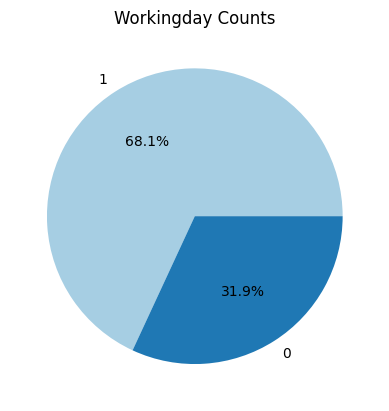

In [ ]:
plt.pie(
    workingday_counts["count"],
    labels = workingday_counts["workingday"],
    autopct = "%1.1f%%",
    colors = plt.cm.Paired.colors
)

plt.title("Workingday Counts")
plt.show()

- The majority of entries correspond to working days, while fewer entries are recorded for non-working days and holidays.

In [ ]:
# Total Rentals by Workingday Status

workingday_rentals = df.groupby("workingday")["count"].sum().reset_index()
workingday_rentals

,workingday,count
0,0,654872
1,1,1430604


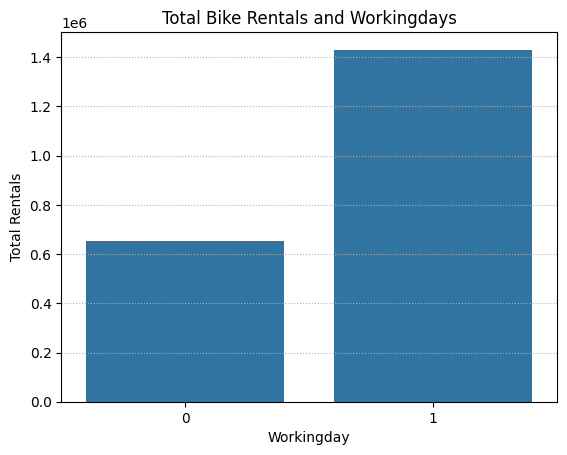

In [ ]:
sns.barplot(
    x = "workingday",
    y = "count",
    data = workingday_rentals
)

plt.title("Total Bike Rentals and Workingdays")
plt.xlabel("Workingday")
plt.ylabel("Total Rentals")
plt.grid(axis = "y", linestyle = ":")
plt.show()

- Working days account for ~68.6% of the total rentals. This indicates a strong weekday usage pattern, likely driven by commuting and daily routines.

- Non-working days make up ~31.4% of total rentals. While lower, this still represents a significant volume, likely due to leisure or weekend activities.

In [ ]:
# Distribution of "weather" column

weather_counts = df["weather"].value_counts().reset_index()
weather_counts

,weather,count
0,1,7192
1,2,2834
2,3,859
3,4,1


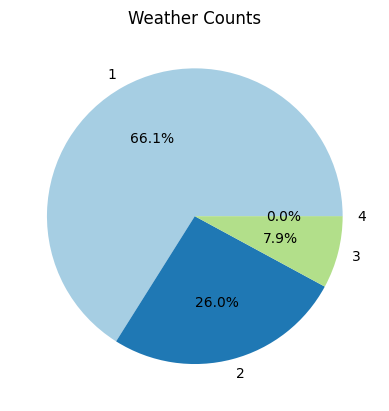

In [ ]:
plt.pie(
    weather_counts["count"],
    labels = weather_counts["weather"],
    autopct = "%1.1f%%",
    colors = plt.cm.Paired.colors
)

plt.title("Weather Counts")
plt.show()

- The majority of records (7,192 entries) in the dataset fall under weather condition 1.

- Weather condition 4 (severe weather like heavy rain or storm) is extremely rare, with only 1 record.

In [ ]:
# Total Rentals by Weather type

workingday_rentals = df.groupby("weather")["count"].sum().reset_index()
workingday_rentals

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


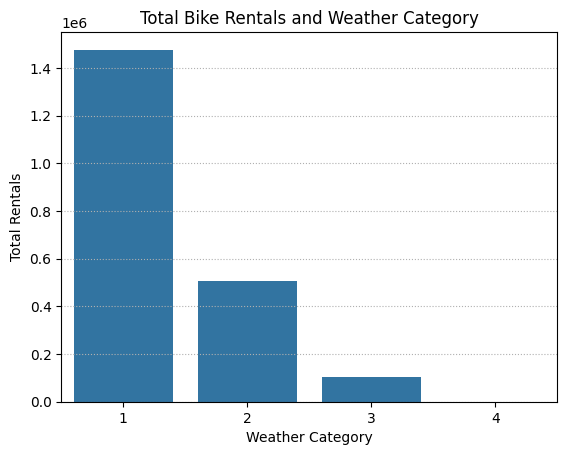

In [ ]:
sns.barplot(
    x = "weather",
    y = "count",
    data = workingday_rentals
)

plt.title("Total Bike Rentals and Weather Category")
plt.xlabel("Weather Category")
plt.ylabel("Total Rentals")
plt.grid(axis = "y", linestyle = ":")
plt.show()

- Weather condition 1 (clear or few clouds) accounts for the overwhelming majority (~70.8%) of rentals. This shows a strong preference for renting in pleasant weather.

- Condition 2 (mist, cloudy) still has a significant number of rentals (~24.3%), suggesting mild adverse weather doesn't strongly deter users.

- Rentals sharply drop in weather condition 3 (light snow/rain) and are nearly non-existent in condition 4 (severe weather). This clearly indicates safety and comfort concerns discourage bike usage in poor weather.

### Numerical Columns

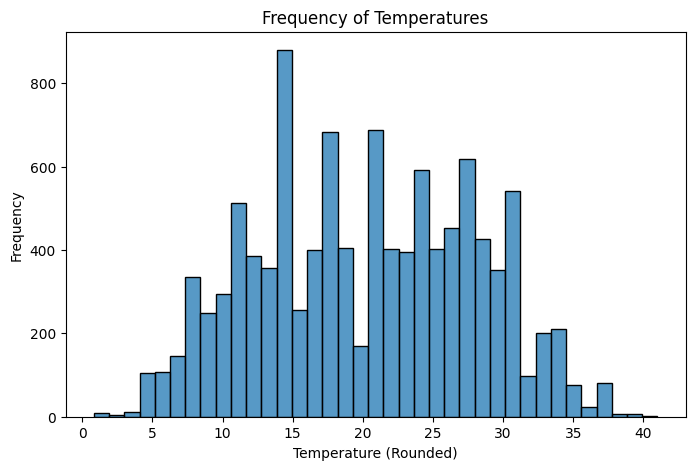

In [ ]:
# Distribution of "temperature" column

plt.figure(figsize = (8, 5))

sns.histplot(
    x = "temp",
    data = df
)

plt.title("Frequency of Temperatures")
plt.xlabel("Temperature (Rounded)")
plt.ylabel("Frequency")
plt.show()

- The dataset includes temperatures ranging from around 0°C to just above 40°C. Most temperatures fall between 5°C and 35°C, which aligns with realistic seasonal conditions in many regions.

- The highest frequency of records occurs around 15°C, with nearly 900 entries, indicating that mild weather conditions were most commonly recorded. Other temperature peaks are also noticeable around 12°C, 18°C, 22°C, and 28°C, suggesting those values are also frequent.

- The histogram shows a roughly multimodal distribution, with multiple local peaks rather than a single bell curve. This may be due to data collected across multiple seasons, each contributing to separate peaks in temperature.

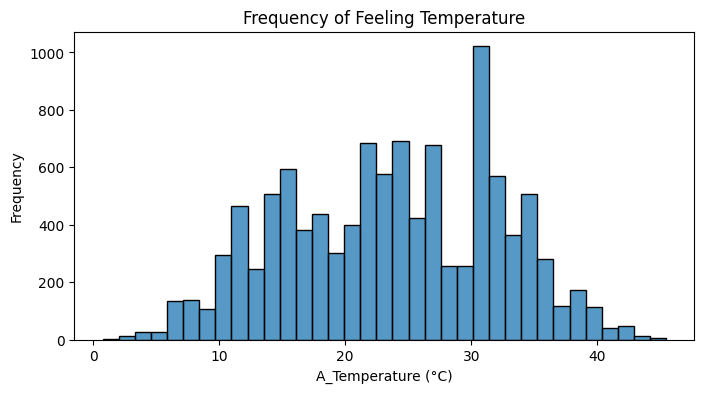

In [ ]:
# Distribution of "atemp" column

plt.figure(figsize = (8, 4))
sns.histplot(
    data = df,
    x = "atemp"
)

plt.title("Frequency of Feeling Temperature")
plt.xlabel("A_Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

- The apparent (feeling) temperatures in the dataset range from just above 0°C to around 45°C. This shows a wide variety of thermal conditions perceived by users, influenced by humidity, wind, and other weather factors.

- The highest frequency occurs at around 31°C, with over 1,000 recorded instances, indicating this is the most frequently perceived temperature. This peak suggests that users most often experienced warm and likely comfortable conditions during their bike rides.

- Feeling temperatures below 5°C and above 40°C are rare, indicating minimal data collected in extremely cold or hot conditions. This may reflect lower bike usage in those extremes.

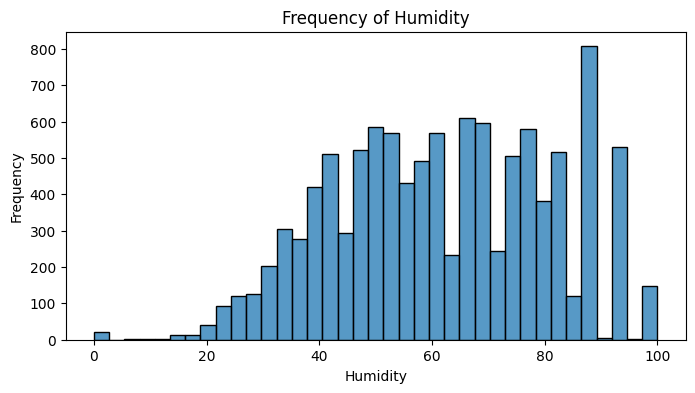

In [ ]:
# Frequency of "humidity" column

plt.figure(figsize = (8, 4))

sns.histplot(
    data = df,
    x = "humidity"
)

plt.title("Frequency of Humidity")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()

- The dataset includes humidity values ranging from 0% to 100%, covering the full possible spectrum of atmospheric moisture. However, values below 20% are extremely rare, indicating minimal data during very dry conditions.

- The highest frequency of records is observed around 85% humidity, with over 800 entries, suggesting the dataset often captures highly humid environments. Other high-frequency ranges include 50%-75%, indicating that moderately to highly humid conditions are well represented.



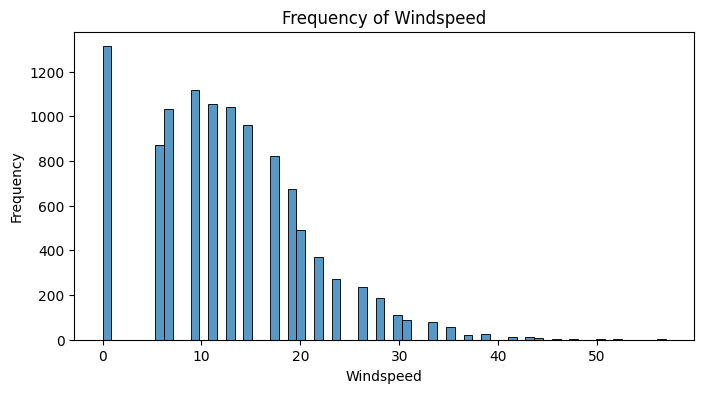

In [ ]:
# Distribution of "windspeed" column

plt.figure(figsize = (8, 4))

sns.histplot(
    data = df,
    x = "windspeed",
)

plt.title("Frequency of Windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Frequency")
plt.show()

- Windspeed values in the dataset range from 0 to over 50 units (likely in km/h or m/s, depending on the dataset context). Most values fall between 0 and 30, with very few instances above 40.

- The highest frequency is at 0, with over 1,200 records, indicating that calm or still conditions are very common in the dataset. Speeds between 5 and 15 also show consistently high frequency, suggesting light winds are the norm.

- As windspeed increases beyond 20, the frequency drops off rapidly. Speeds above 35 are rare, and beyond 45, nearly absent, suggesting the dataset rarely includes strong wind conditions.

- The histogram is right-skewed (positively skewed):
  - The bulk of data is on the left (low windspeed).
  - A long tail extends to the right, toward higher speeds with low frequency.

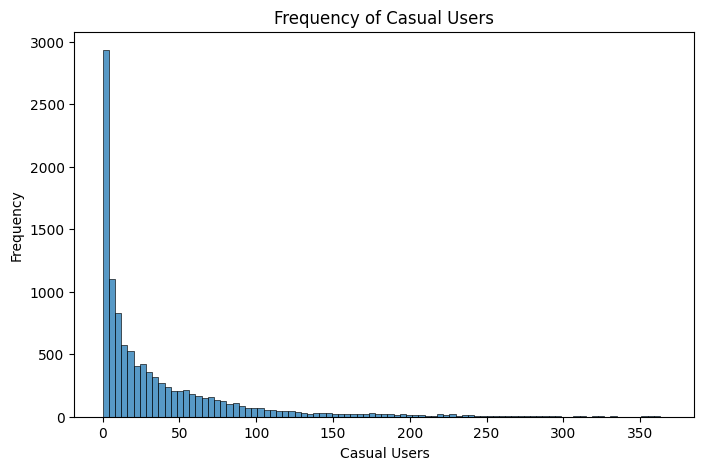

In [ ]:
# Distribution of "casual" column

plt.figure(figsize = (8, 5))

sns.histplot(
    x = "casual",
    data = df
)

plt.title("Frequency of Casual Users")
plt.xlabel("Casual Users")
plt.ylabel("Frequency")
plt.show()

- The number of casual users per record ranges from 0 up to around 350. However, most records contain relatively low casual user counts.

- The highest bar appears at 0, with nearly 3,000 entries, indicating that in many time intervals, no casual users rented bikes. This suggests that casual usage is sporadic or limited to certain periods (e.g., weekends, holidays, or specific seasons).

- There is a steep drop in frequency as the number of casual users increases. Very few records show more than 100 casual users per interval, and counts above 200 are extremely rare.

- The histogram is heavily right-skewed (positively skewed):
  - Most data is concentrated at the lower end (0-50 casual users).
  - A long tail extends toward the right, where larger values occur infrequently.

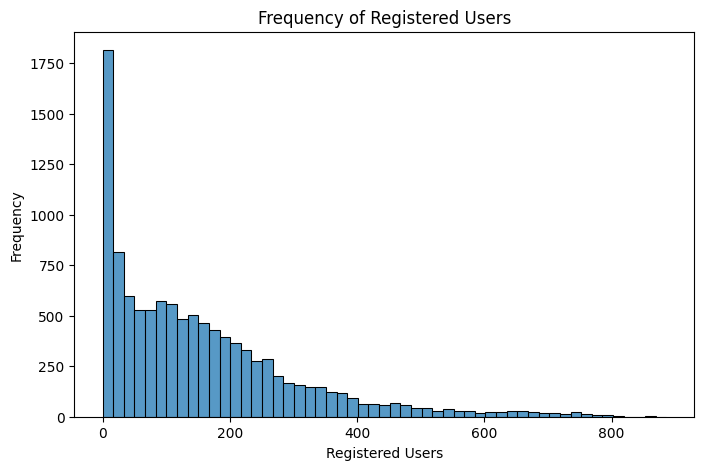

In [ ]:
# Frequency of "registered" column

plt.figure(figsize = (8, 5))

sns.histplot(
    x = "registered",
    data = df
)

plt.title("Frequency of Registered Users")
plt.xlabel("Registered Users")
plt.ylabel("Frequency")
plt.show()

- The number of registered users per time interval ranges from 0 up to over 800. This is significantly higher than the casual user range, indicating that registered users are the dominant user base.

- The highest frequency occurs at low user counts, particularly around 0-50 registered users. However, even higher user counts (e.g., 100-400) appear more frequently than similar counts for casual users, showing consistent engagement.

- Unlike the steep drop seen with casual users, the frequency of registered users declines more gradually. This suggests that registered users are more active and consistently present, with many intervals showing moderate to high user counts.

- The histogram is right-skewed (positively skewed):
  - Most of the data lies at lower user counts.
  - A long tail extends to the right, showing occasional high usage spikes, possibly during peak commuting hours or special events.

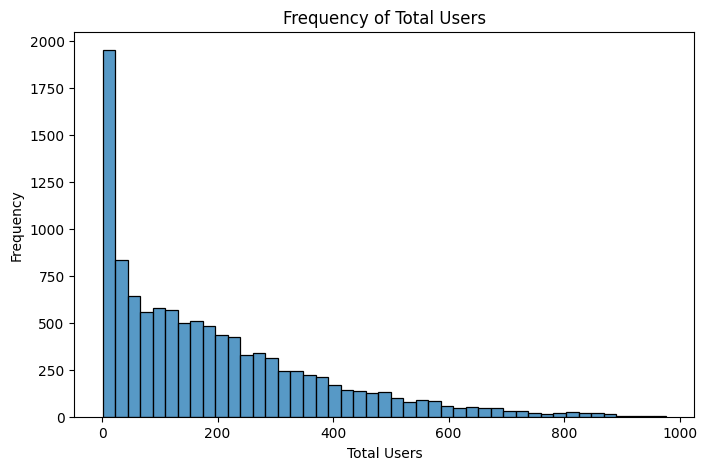

In [ ]:
# Frequency of "count" column

plt.figure(figsize = (8, 5))

sns.histplot(
    x = "count",
    data = df
)

plt.title("Frequency of Total Users")
plt.xlabel("Total Users")
plt.ylabel("Frequency")
plt.show()

- Most of the records have total users between 0 and 100. The peak frequency is close to 2000 for this range.
- The data has a long tail extending toward higher values (up to around 1000 users), indicating a small number of occurrences with high user counts.
- Bins toward the rightmost part of the histogram (800-1000 users) have very low frequency, suggesting possible outliers or rare events.

## III. Outliers

### A. Outliers detection in Categorical columns

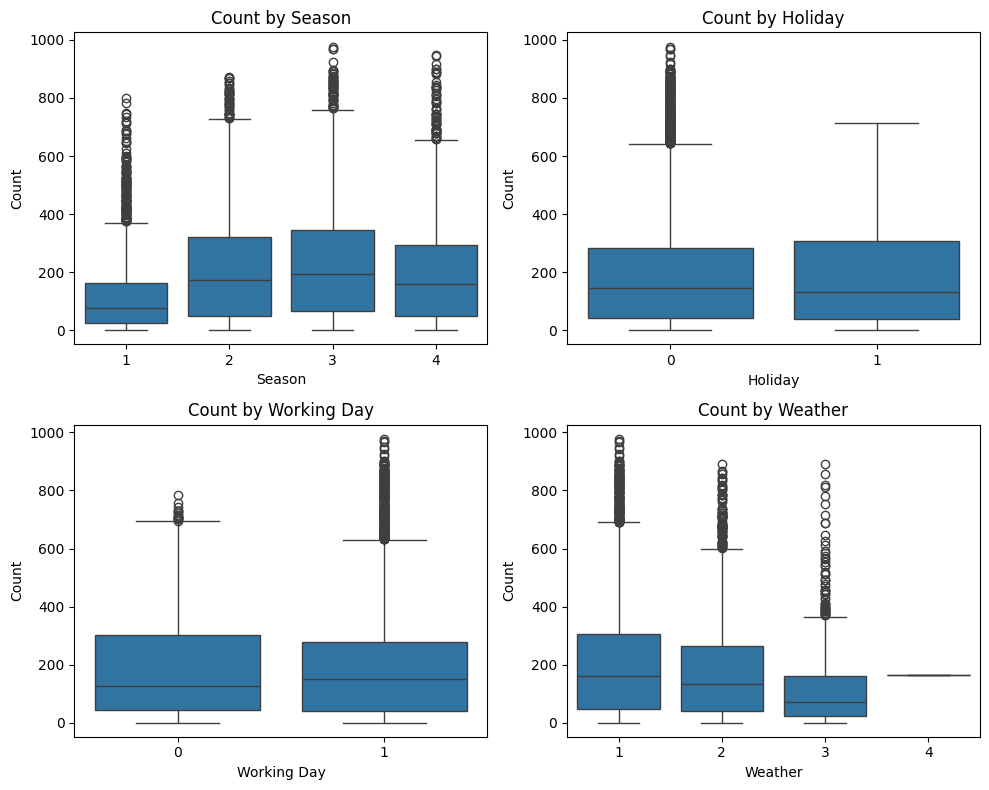

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

# Plot 1: Season vs Count
sns.boxplot(
    x = "season",
    y = "count",
    data = df,
    ax = axes[0, 0]
)
axes[0, 0].set_title("Count by Season")
axes[0, 0].set_xlabel("Season")
axes[0, 0].set_ylabel("Count")

# Plot 2: Holiday vs Count
sns.boxplot(
    x = "holiday",
    y = "count",
    data = df,
    ax = axes[0, 1]
)
axes[0, 1].set_title("Count by Holiday")
axes[0, 1].set_xlabel("Holiday")
axes[0, 1].set_ylabel("Count")

# Plot 3: Workingday vs Count
sns.boxplot(
    x = "workingday",
    y = "count",
    data = df,
    ax = axes[1, 0]
)
axes[1, 0].set_title("Count by Working Day")
axes[1, 0].set_xlabel("Working Day")
axes[1, 0].set_ylabel("Count")

# Plot 4: Weather vs Count
sns.boxplot(
    x = "weather",
    y = "count",
    data = df,
    ax = axes[1, 1]
)
axes[1, 1].set_title("Count by Weather")
axes[1, 1].set_xlabel("Weather")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

1. Count by Season
- All four seasons (1: Spring, 2: Summer, 3: Fall, 4: Winter) have comparable median rental counts, but:
  - Summer and Fall (Seasons 2 and 3) show slightly higher medians and wider interquartile ranges (IQR).
  - There are many outliers in every season, especially in Spring and Winter, indicating peak rental spikes during these periods.

2. Count by Holiday
  - Median rental count is slightly lower on holidays, but the difference is not drastic.
  - The spread is similar across holidays and non-holidays, but non-holidays show more extreme outliers, possibly due to rush-hour commuting.

3. Count by Working Day
  - Working days (1) have a slightly higher median than non-working days (0).
  - Both categories show many extreme outliers, but the range of rental counts is broader on working days, likely due to commuting usage.

4. Count by Weather
  - Weather condition 1 (clear) shows the highest median and widest IQR, indicating frequent and consistent rentals.
  - As the weather worsens (2 --> 3 --> 4), the median rental count drops, and the range narrows, showing less variability and fewer high-usage spikes.
  - Weather condition 4 (severe) has very limited data but a very low, flat count.

### B. Outliers detection in Numerical columns

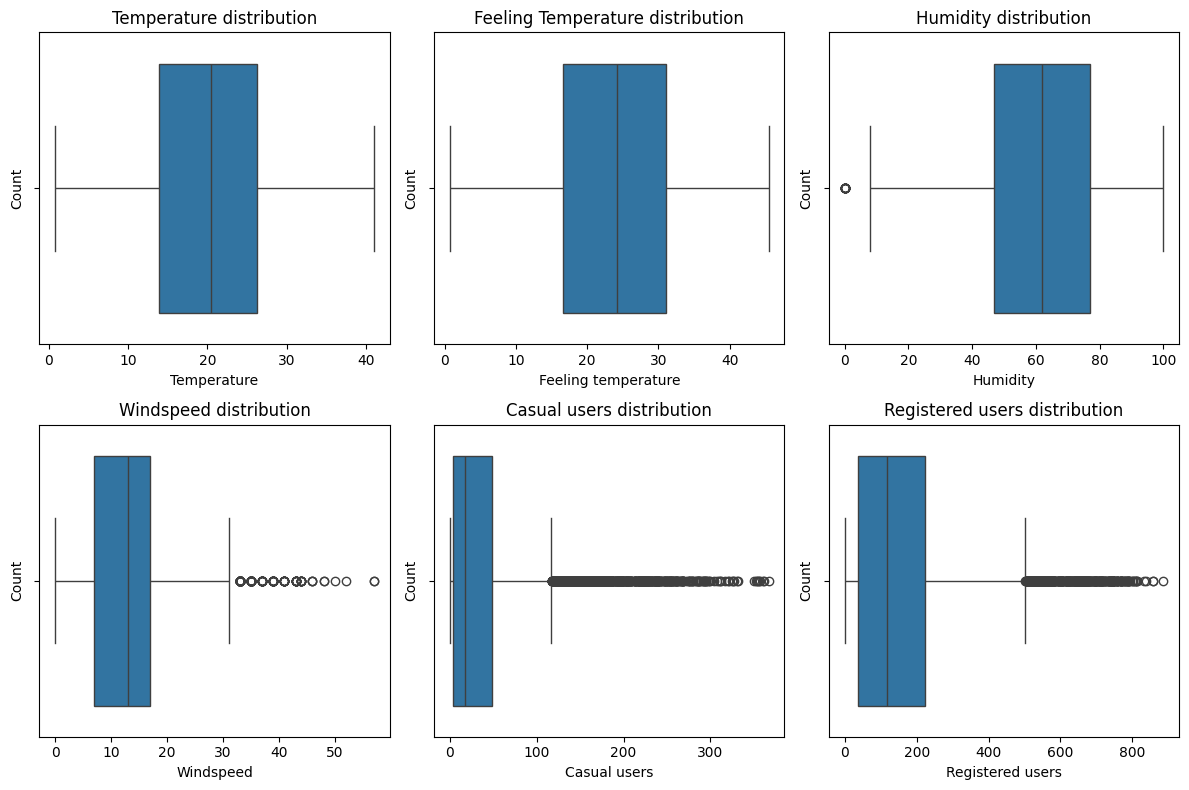

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (12, 8))

# Plot 1: Temperature distribution
sns.boxplot(
    x = "temp",
    data = df,
    ax = axes[0, 0]
)
axes[0, 0].set_title("Temperature distribution")
axes[0, 0].set_xlabel("Temperature")
axes[0, 0].set_ylabel("Count")

# Plot 2: Feeling Temperature distribution
sns.boxplot(
    x = "atemp",
    data = df,
    ax = axes[0, 1]
)
axes[0, 1].set_title("Feeling Temperature distribution")
axes[0, 1].set_xlabel("Feeling temperature")
axes[0, 1].set_ylabel("Count")

# Plot 3: Humidity distribution
sns.boxplot(
    x = "humidity",
    data = df,
    ax = axes[0, 2]
)
axes[0, 2].set_title("Humidity distribution")
axes[0, 2].set_xlabel("Humidity")
axes[0, 2].set_ylabel("Count")

# Plot 4: Windspeed distribution
sns.boxplot(
    x = "windspeed",
    data = df,
    ax = axes[1, 0]
)
axes[1, 0].set_title("Windspeed distribution")
axes[1, 0].set_xlabel("Windspeed")
axes[1, 0].set_ylabel("Count")

# Plot 5: Casual users distribution
sns.boxplot(
    x = "casual",
    data = df,
    ax = axes[1, 1]
)
axes[1, 1].set_title("Casual users distribution")
axes[1, 1].set_xlabel("Casual users")
axes[1, 1].set_ylabel("Count")

# Plot 6: Registered users distribution
sns.boxplot(
    x = "registered",
    data = df,
    ax = axes[1, 2]
)
axes[1, 2].set_title("Registered users distribution")
axes[1, 2].set_xlabel("Registered users")
axes[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()

1. Temperature Distribution
  - The temperature data is fairly symmetrical and evenly spread.
  - No visible outliers.
  - The interquartile range (IQR) lies mostly between ~10°C and ~30°C.

2. Feeling Temperature (atemp) Distribution
  - Similar distribution to actual temperature.
  - Well-centered box with no visible outliers.

3. Humidity Distribution
  - Mostly symmetric, but has a few outliers on the lower end (very low humidity values).
  - Majority of humidity levels are between ~40% to ~90%.

4. Windspeed Distribution
  - Data is right-skewed with many outliers above 30 units.
  - Most values cluster between 5 and 20.

5. Casual Users Distribution
  - Highly right-skewed with a large number of outliers.
  - Most casual user counts are below 100, but some go well beyond 300.

6. Registered Users Distribution
  - Right-skewed with fewer but significant outliers.
  - Most counts are between 100-400, with outliers going beyond 800.

### C. Target Column
- Count

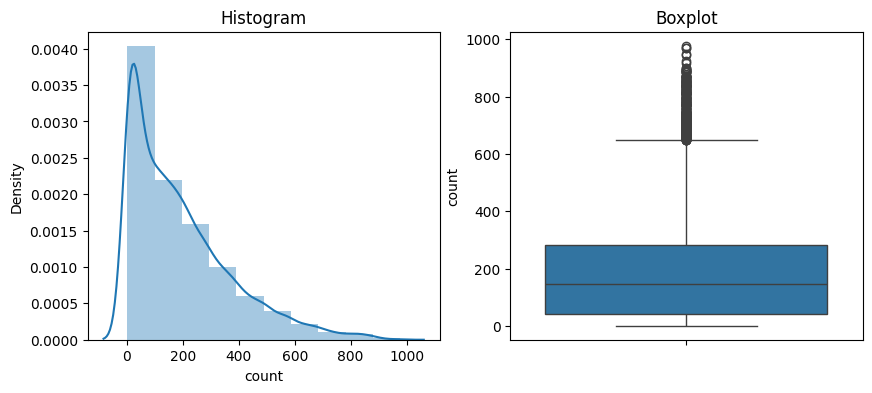

In [ ]:
plt.figure(figsize = (10, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.distplot(df["count"], bins = 10)
plt.title("Histogram")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y = df["count"])
plt.title("Boxplot")

plt.show()

- **Observation:**
  - The unusually high bike ride counts on certain days likely reflect surges in demand say, during holidays or special events. Because these spikes capture genuine variation in user behavior, the best approach is to keep them in the dataset rather than remove them as outliers.

## IV. Correlation

In [ ]:
# Correlation Matrix of Numerical Features

numeric_df = df.select_dtypes(include = ["number"])
numeric_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


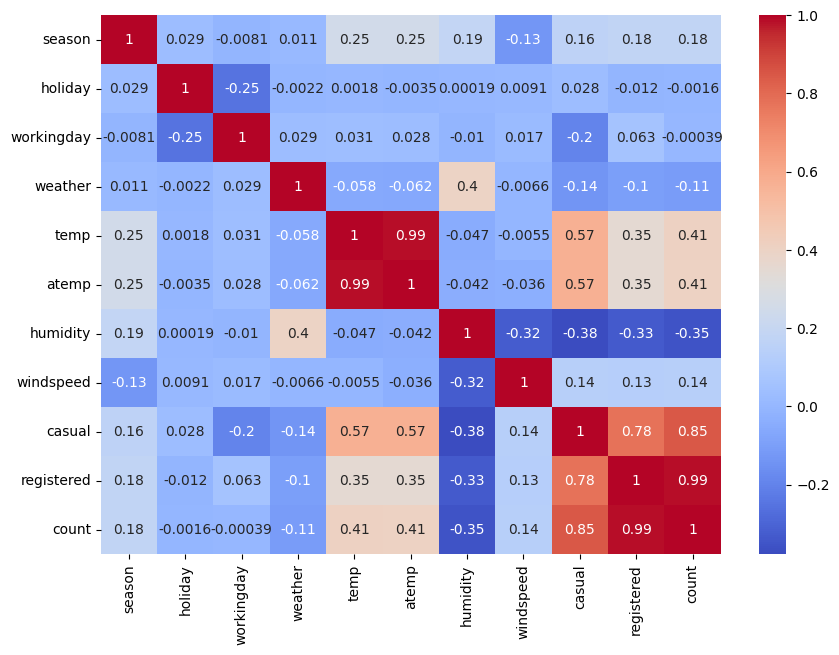

In [ ]:
# Correlation Heatmap -

plt.figure(figsize = (10, 7))

sns.heatmap(
    numeric_df.corr(method = "spearman"),
    annot = True,
    cmap = "coolwarm"
)

plt.show()

1. Strong Correlations:
  - count vs registered: 0.99, Almost perfect positive correlation, meaning the total rental count is primarily driven by registered users.
  - count vs casual: 0.85, Strong positive correlation, but lower than registered, suggesting casual users also contribute significantly but with more fluctuation.
  - temp vs atemp: 0.99, Near-perfect correlation, as expected since "atemp" (feeling temperature) is derived from or aligned with "temp".

2. Moderate Correlations:
  - temp / atemp vs count: ~0.41, Moderate positive correlation, indicating that higher temperatures may encourage more rentals, especially in pleasant weather.
  - casual vs temp / atemp: 0.57, Casual users are more weather-sensitive, increasing usage when it's warm.
  - registered vs temp / atemp: 0.35, Registered users show a weaker correlation with weather, possibly indicating commuter behavior regardless of climate.

3. Negative Correlations:
  - humidity vs count: -0.35, As humidity increases, bike rentals tend to decrease—likely due to discomfort or rain.
  - windspeed vs count: -0.14, Mild negative correlation - high wind discourages rentals, but the effect is less prominent than humidity.
  - workingday vs holiday: -0.25, Negative by definition (non-working days are usually holidays).

4. Very Weak or No Correlation:
  - weather, season, windspeed show very low correlations with most variables (close to 0), suggesting minimal direct linear impact.
  - workingday and holiday have low correlation with count, implying usage is relatively steady across weekdays and weekends when averaged.



In [ ]:
# Dropping highly correlated columns and storing data in a new DataFrame

df1 = df.drop(columns = ["casual", "registered", "atemp"])

# We will use count(casual+registered) feature and temp feature

## V. Is there any significant difference between the number of bike rides on weekdays and weekends?

- workingday - 1
- weekend or holiday - 0

In [ ]:
# Descriptive Statistics of "count" grouped by Working Day

df1.groupby("workingday")["count"].describe().reset_index()

,workingday,count,mean,std,min,25%,50%,75%,max
0,0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


- The mean number of rentals on working days appears to be higher than on weekends or holidays.

- However, we will perform statistical test to confirm whether the differences in mean are statistically significant, or if they could have occurred by chance due to random variation.

In [ ]:
# Sampling equal-sized groups of Bike Ride Counts for Weekdays and Weekends for Hypothesis Testing

weekday = df[df["workingday"] == 1]["count"].sample(2500)
weekend_holiday = df[df["workingday"] == 0]["count"].sample(2500)

### Step 1: Hypothesis

- Ho: There is no significant difference in the mean number of bike rides between weekdays and weekends.
- Ha: There is a significant difference in the mean number of bike rides between weekdays and weekends.

### Step 2: Test

- Since we are comparing the means of two independent groups — weekdays and weekends, a **two-sample t-test** is appropriate.

### Step 3: Assumptions

#### Assumption 1: Test for Normality

##### QQ Plot

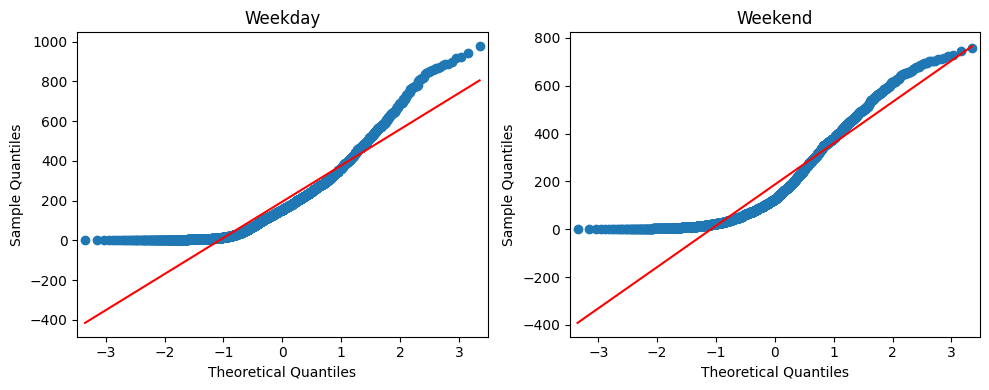

In [ ]:
plt.figure(figsize = (10, 4))

# Subplot for Weekday
ax1 = plt.subplot(1, 2, 1)
qqplot(
    weekday,
    line = "s",
    ax = ax1)
ax1.set_title("Weekday")

# Subplot for Weekend
ax2 = plt.subplot(1, 2, 2)
qqplot(
    weekend_holiday,
    line = "s",
    ax = ax2)
ax2.set_title("Weekend")

plt.tight_layout()
plt.show()

- The Q-Q plots for both weekday and weekend ride counts show noticeable deviation from the red reference line, particularly at the lower and upper ends. This indicates departure from normality, suggesting that the distributions are right-skewed and contain outliers.

##### Shapiro-Wilk Test

In [ ]:
# For Weekdays

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    weekday
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8811546737419367 , P-value: 3.9134397760582185e-40
Reject null hypothesis. Data is not normally distributed.


In [ ]:
# For Weekends

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    weekend_holiday
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8833537824839327 , P-value: 7.385095441829764e-40
Reject null hypothesis. Data is not normally distributed.


#### Assumption 2: Test for Homogeneity of Variance

##### Levene Test

In [ ]:
# Ho : The variances of the two groups (weekdays and weekends) are equal.
# Ha : The variances of the two groups are not equal.

test_stat, p_value = levene(
    weekday,
    weekend_holiday
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Both the groups do not have equal variance.")
else:
  print("Fail to reject null hypothesis. Both the groups have equal variance.")

Test-stat: 0.14238285933244169 , P-value: 0.7059395468748686
Fail to reject null hypothesis. Both the groups have equal variance.


- Assumption of equal variances holds true.

### Step 4: Significance Level

In [ ]:
alpha = 0.05

### Step 5: Test Statistics and P-value

In [ ]:
test_stat, p_value = ttest_ind(
    weekday,
    weekend_holiday,
    equal_var = True,           # Student's t-test
    alternative = "two-sided"
)

print("Test statistics:", test_stat, ", P-value:", p_value)

Test statistics: 1.5902162931685169 , P-value: 0.11184930526585618


### Step 6: Comparison

In [ ]:
if p_value < alpha:
  print(f"As the p-value ({p_value}) is less than the level of significance ({alpha}), we reject the null hypothesis.")
else:
  print(f"As the p-value ({p_value}) is greater than the level of significance ({alpha}), we fail to reject the null hypothesis.")

As the p-value (0.11184930526585618) is greater than the level of significance (0.05), we fail to reject the null hypothesis.


### **Observation:**
  - Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we can say there is a evidence that bike rentals differ between weekdays and weekends.

## VI. Is the demand of bicycles on rent is the same for different Weather conditions?

In [ ]:
# Descriptive Statistics of "count" grouped by Weather type

df1.groupby("weather")["count"].describe().reset_index()

,weather,count,mean,std,min,25%,50%,75%,max
0,1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
1,2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
2,3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
3,4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
# Sampling equal-sized groups of Bike Ride Counts for different weathers for Hypothesis Testing

weather_1 = df[df["weather"] == 1]["count"].sample(800)
weather_2 = df[df["weather"] == 2]["count"].sample(800)
weather_3 = df[df["weather"] == 3]["count"].sample(800)

# We will not take weather == 4, because there is only one entry for it.

- The mean number of rentals on weather 1 appears to be higher than mean number of rentals on weather 2 and weather 3.

- However, we will perform statistical test to confirm whether the differences in mean are statistically significant, or if they could have occurred by chance due to random variation.

### Step 1: Hypothesis
  - Ho : The mean number of bike rides is the same across all weather conditions.
  - Ha : The mean number of bike rides differs for at least one weather condition.

### Step 2: Test

- Since we want to compare the means of a quantitative variable (count) across three independent groups (weather 1, 2, and 3), we will use a **one-way ANOVA**.

### Step 3: Assumptions

#### Assumption 1: Test for Normality

##### A. Histogram

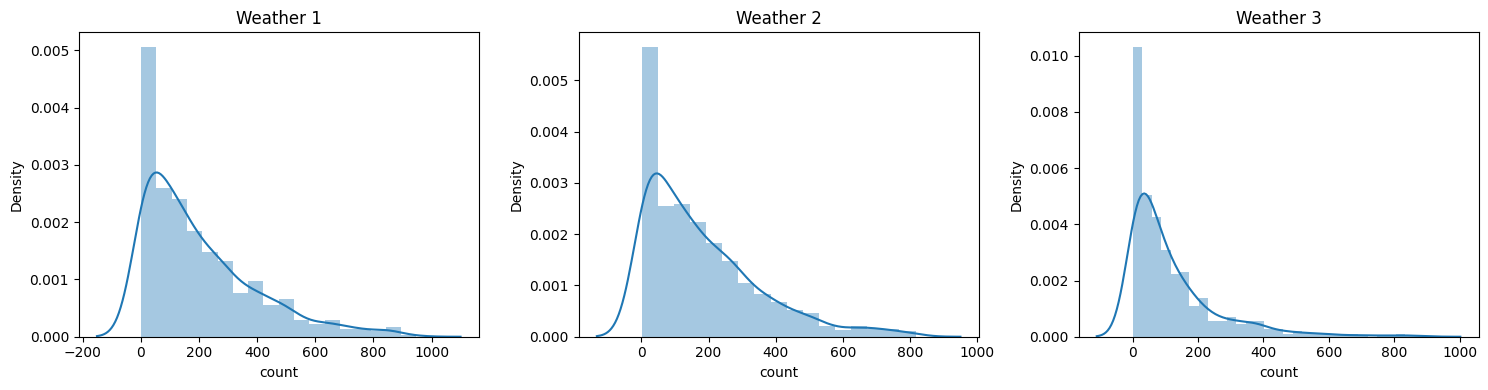

In [ ]:
plt.figure(figsize = (15, 4))

# Plot for Weather 1
plt.subplot(1, 3, 1)
sns.distplot(
    weather_1,
    kde = True
)
plt.title("Weather 1")

# Plot for Weather 2
plt.subplot(1, 3, 2)
sns.distplot(
    weather_2,
    kde = True
)
plt.title("Weather 2")

# Plot for Weather 3
plt.subplot(1, 3, 3)
sns.distplot(
    weather_3,
    kde = True
)
plt.title("Weather 3")

plt.tight_layout()
plt.show()

##### B. QQ Plot

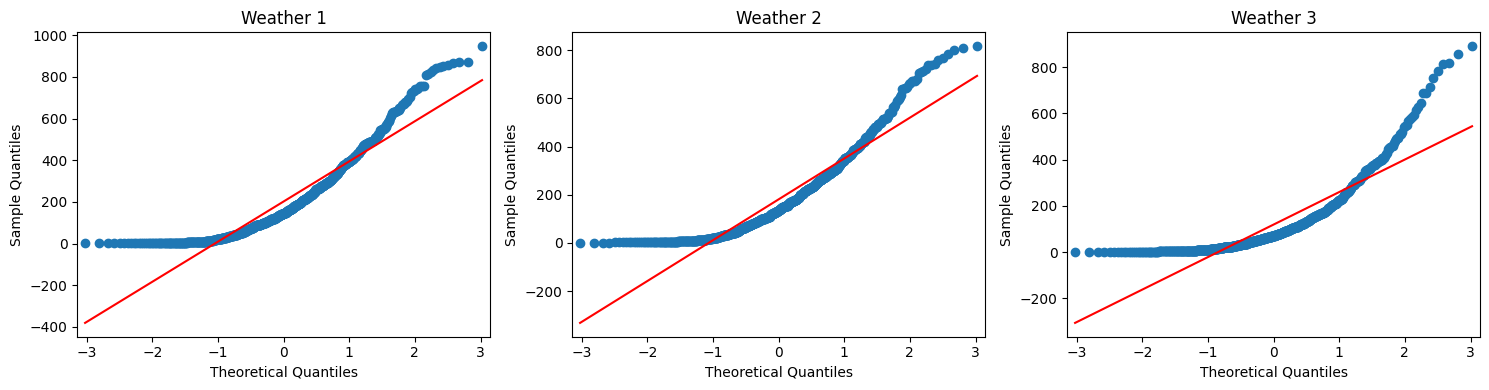

In [ ]:
plt.figure(figsize = (15, 4))

# Subplot for Weather 1
ax1 = plt.subplot(1, 3, 1)
qqplot(
    weather_1,
    line = "s",
    ax = ax1)
ax1.set_title("Weather 1")

# Subplot for Weather 2
ax2 = plt.subplot(1, 3, 2)
qqplot(
    weather_2,
    line = "s",
    ax = ax2)
ax2.set_title("Weather 2")

# Subplot for Weather 3
ax3 = plt.subplot(1, 3, 3)
qqplot(
    weather_3,
    line = "s",
    ax = ax3
)
ax3.set_title("Weather 3")

plt.tight_layout()
plt.show()

##### C. Skewness and Kurtosis

In [ ]:
print("For Weather 1 - Skewness is:", skew(weather_1), "and Kurtosis is:", kurtosis(weather_1))
print("For Weather 2 - Skewness is:", skew(weather_2), "and Kurtosis is:", kurtosis(weather_2))
print("For Weather 3 - Skewness is:", skew(weather_3), "and Kurtosis is:", kurtosis(weather_3))

For Weather 1 - Skewness is: 1.2750847571363984 and Kurtosis is: 1.2967605381380247
For Weather 2 - Skewness is: 1.2788746280380288 and Kurtosis is: 1.415807873681496
For Weather 3 - Skewness is: 2.1880028272792953 and Kurtosis is: 5.871161142511275


##### D. Shapiro-Wilk's Test

In [ ]:
# For Weather 1

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    weather_1
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8716482879920197 , P-value: 4.224850196616806e-25
Reject null hypothesis. Data is not normally distributed.


In [ ]:
# For Weather 2

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    weather_2
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8754234700887557 , P-value: 9.0115901961228e-25
Reject null hypothesis. Data is not normally distributed.


In [ ]:
# For Weather 3
# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    weather_3
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.7617905378172574 , P-value: 1.9571945996020184e-32
Reject null hypothesis. Data is not normally distributed.


- All normality tests indicated significant deviations from a normal distribution.

#### Assumption 2: Test for Homogeneity of Variance

##### A.

In [ ]:
print("Variance for Weather 1:", weather_1.var())
print("Variance for Weather 2:", weather_2.var())
print("Variance for Weather 3:", weather_3.var())

Variance for Weather 1: 37204.479543179004
Variance for Weather 2: 28816.708659261614
Variance for Weather 3: 19827.202401439237


##### B. Levene Test

In [ ]:
# Ho : All the variance are equal
# Ha : Atleast one of the variance is different

test_stat, p_value = levene(
    weather_1,
    weather_2,
    weather_3
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Atleast one of the variance is different.")
else:
  print("Fail to reject null hypothesis. All the variance are equal.")

Test-stat: 37.39317224322978 , P-value: 1.0198606419483073e-16
Reject null hypothesis. Atleast one of the variance is different.


- The assumption of equal variances is violated.

### Step 4: Significance Level

In [ ]:
alpha = 0.05

### Step 5: Test Statistics and P-value using ANOVA Test

In [ ]:
f_stat, p_value = f_oneway(
    weather_1,
    weather_2,
    weather_3
)

print("Test-Statistics:", f_stat, "and P-Value:", p_value)

Test-Statistics: 52.039590024045175 and P-Value: 7.523167916233442e-23


### Step 6: Comparison

In [ ]:
if p_value < alpha:
  print(f"As the p-value ({p_value}) is less than the level of significance ({alpha}), we reject the null hypothesis.")
else:
  print(f"As the p-value ({p_value}) is greater than the level of significance ({alpha}), we fail to reject the null hypothesis.")

As the p-value (7.523167916233442e-23) is less than the level of significance (0.05), we reject the null hypothesis.


### Step 7: Test Statistics and P-value using Kruskal Wallis Test

In [ ]:
test_stats, p_value = kruskal(
    weather_1,
    weather_2,
    weather_3
)

print("Test-Statistics:", test_stats, "and P-Value:", p_value)

Test-Statistics: 107.71925085580656 and P-Value: 4.0650124427972244e-24


### Step 8: Comparison

In [ ]:
if p_value < alpha:
  print(f"As the p-value ({p_value}) is less than the level of significance ({alpha}), we reject the null hypothesis.")
else:
  print(f"As the p-value ({p_value}) is greater than the level of significance ({alpha}), we fail to reject the null hypothesis.")

As the p-value (4.0650124427972244e-24) is less than the level of significance (0.05), we reject the null hypothesis.


### **Observation:**
  - Since the p-value is less than the 5% significance level in both the tests (ANOVA and Kruskal-Wallis), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of bike rides in different weather conditions are not equal.

## VII. Is the demand of bicycles on rent is the same for different Seasons?

In [ ]:
# Descriptive Statistics of "count" grouped by Season type

df1.groupby("season")["count"].describe().reset_index()

,season,count,mean,std,min,25%,50%,75%,max
0,1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
1,2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
2,3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
3,4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
# Sampling equal-sized groups of Bike Ride Counts for different Seasons for Hypothesis Testing

season_1 = df[df["season"] == 1]["count"].sample(2500)
season_2 = df[df["season"] == 2]["count"].sample(2500)
season_3 = df[df["season"] == 3]["count"].sample(2500)
season_4 = df[df["season"] == 4]["count"].sample(2500)

- We will perform statistical test to confirm whether the differences in mean are statistically significant, or if they could have occurred by chance due to random variation.

### Step 1: Hypothesis

- Ho : The mean number of bike rides is the same across all seasons.
- Ha : The mean number of bike rides differs across at least one season.

### Step 2: Test
- Since we want to compare the means of a quantitative variable (count) across four independent groups (season 1, 2, 3 and 4), we will use a **one-way ANOVA**.

### Step 3: Assumptions

#### Assumption 1: Test for Normality

##### A. Histogram

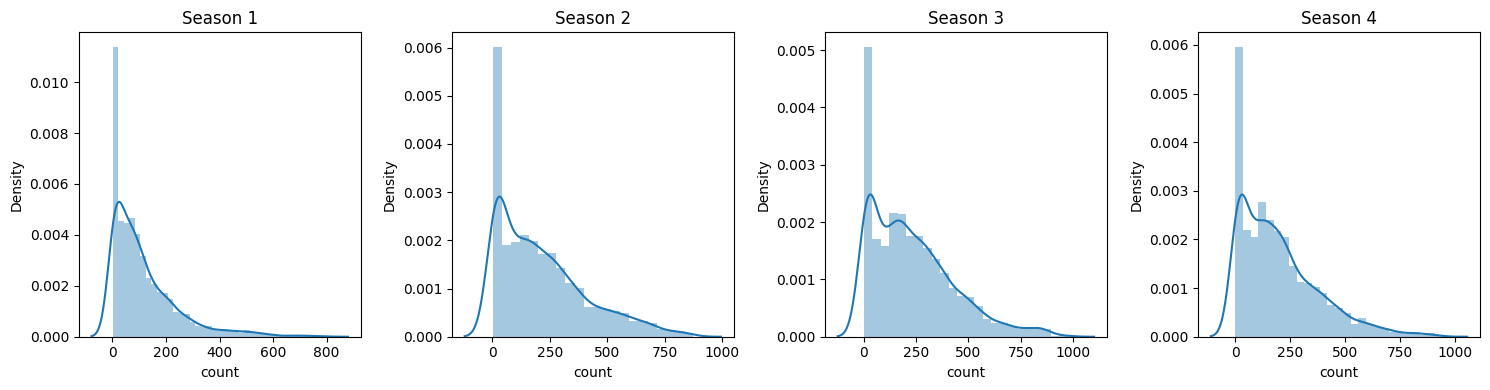

In [ ]:
plt.figure(figsize = (15, 4))

# Plot for Season 1
plt.subplot(1, 4, 1)
sns.distplot(
    season_1,
    kde = True
)
plt.title("Season 1")

# Plot for Season 2
plt.subplot(1, 4, 2)
sns.distplot(
    season_2,
    kde = True
)
plt.title("Season 2")

# Plot for Season 3
plt.subplot(1, 4, 3)
sns.distplot(
    season_3,
    kde = True
)
plt.title("Season 3")

# Plot for Season 4
plt.subplot(1, 4, 4)
sns.distplot(
    season_4,
    kde = True
)
plt.title("Season 4")

plt.tight_layout()
plt.show()

##### B. QQ Plot

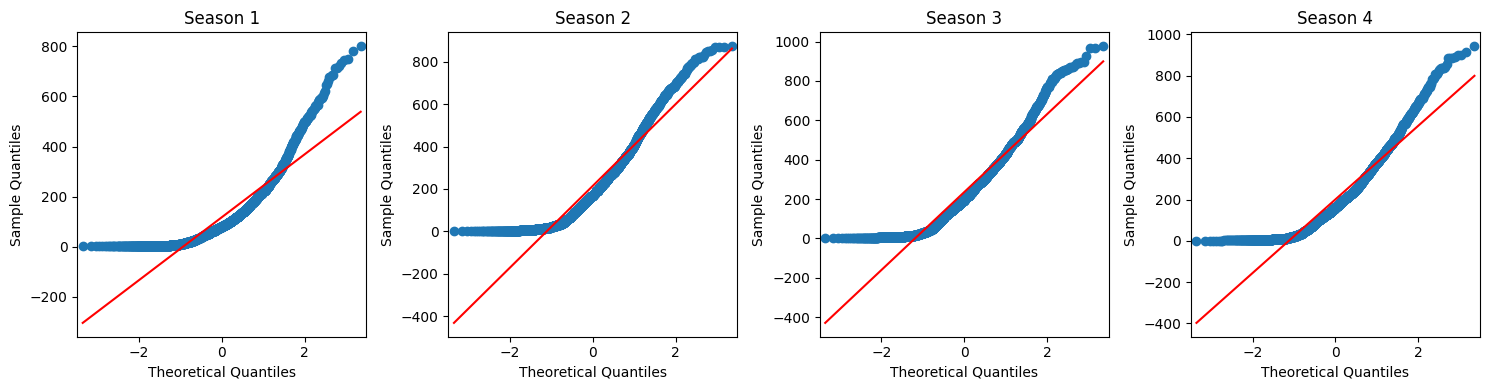

In [ ]:
plt.figure(figsize = (15, 4))

# Subplot for Season 1
ax1 = plt.subplot(1, 4, 1)
qqplot(
    season_1,
    line = "s",
    ax = ax1)
ax1.set_title("Season 1")

# Subplot for Season 2
ax2 = plt.subplot(1, 4, 2)
qqplot(
    season_2,
    line = "s",
    ax = ax2)
ax2.set_title("Season 2")

# Subplot for Season 3
ax3 = plt.subplot(1, 4, 3)
qqplot(
    season_3,
    line = "s",
    ax = ax3
)
ax3.set_title("Season 3")

# Subplot for Season 4
ax3 = plt.subplot(1, 4, 4)
qqplot(
    season_4,
    line = "s",
    ax = ax3
)
ax3.set_title("Season 4")

plt.tight_layout()
plt.show()

##### C. Skewness and Kurtosis

In [ ]:
print("For Season 1 - Skewness is:", skew(season_1), "and Kurtosis is:", kurtosis(season_1))
print("For Season 2 - Skewness is:", skew(season_2), "and Kurtosis is:", kurtosis(season_2))
print("For Season 3 - Skewness is:", skew(season_3), "and Kurtosis is:", kurtosis(season_3))
print("For Season 4 - Skewness is:", skew(season_4), "and Kurtosis is:", kurtosis(season_4))

For Season 1 - Skewness is: 1.8755820630773736 and Kurtosis is: 4.221875899859327
For Season 2 - Skewness is: 1.0068181924821957 and Kurtosis is: 0.42162671273761276
For Season 3 - Skewness is: 0.9940420838006265 and Kurtosis is: 0.6905773706682248
For Season 4 - Skewness is: 1.1708641248837959 and Kurtosis is: 1.2307402533700946


##### D. Shapiro-Wilk's Test

In [ ]:
# For Season 1

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    season_1
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8097692691386573 , P-value: 2.0864861453014935e-47
Reject null hypothesis. Data is not normally distributed.


In [ ]:
# For Season 2

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    season_2
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8991641145682181 , P-value: 9.663368605040153e-38
Reject null hypothesis. Data is not normally distributed.


In [ ]:
# For Season 3

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    season_3
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.9139900774108618 , P-value: 1.6888262188782576e-35
Reject null hypothesis. Data is not normally distributed.


In [ ]:
# For Season 4

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    season_4
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8955748785493397 , P-value: 3.036074997539609e-38
Reject null hypothesis. Data is not normally distributed.


- All normality tests indicated significant deviations from a normal distribution.

#### Assumption 2: Test for Homogeneity of Variance

##### A.

In [ ]:
print("Variance for Season 1:", season_1.var())
print("Variance for Season 2:", season_2.var())
print("Variance for Season 3:", season_3.var())
print("Variance for Season 4:", season_4.var())

Variance for Season 1: 15835.665190076046
Variance for Season 2: 37209.856506442586
Variance for Season 3: 39299.940194317736
Variance for Season 4: 31881.18220472182


##### B. Levene Test

In [ ]:
# Ho : All the variance are equal
# Ha : Atleast one of the variance is different

test_stat, p_value = levene(
    season_1,
    season_2,
    season_3,
    season_4
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Atleast one of the variance is different.")
else:
  print("Fail to reject null hypothesis. All the variance are equal.")

Test-stat: 173.0358862756918 , P-value: 2.270053389225959e-109
Reject null hypothesis. Atleast one of the variance is different.


- The assumption of equal variances is violated.

### Step 4: Significance Level

In [ ]:
alpha = 0.05

### Step 5: Test Statistics and P-value using ANOVA test

In [ ]:
f_stat, p_value = f_oneway(
    season_1,
    season_2,
    season_3,
    season_4
)

print("Test-Stats:", f_stat, "and P-Value:", p_value)

Test-Stats: 216.76486682158938 and P-Value: 3.083836116143997e-136


### Step 6: Comparison

In [ ]:
if p_value < alpha:
  print(f"As the p-value ({p_value}) is less than the level of significance ({alpha}), we reject the null hypothesis.")
else:
  print(f"As the p-value ({p_value}) is greater than the level of significance ({alpha}), we fail to reject the null hypothesis.")

As the p-value (3.083836116143997e-136) is less than the level of significance (0.05), we reject the null hypothesis.


### Step 7: Test Statistics and P-value using Kruskal-Wallis test

In [ ]:
test_stats, p_value = kruskal(
    season_1,
    season_2,
    season_3,
    season_4
)

print("Test-Statistics:", test_stats, "and P-Value:", p_value)

Test-Statistics: 639.9193929719017 and P-Value: 2.2333108148166376e-138


### Step 8: Comparison

In [ ]:
if p_value < alpha:
  print(f"As the p-value ({p_value}) is less than the level of significance ({alpha}), we reject the null hypothesis.")
else:
  print(f"As the p-value ({p_value}) is greater than the level of significance ({alpha}), we fail to reject the null hypothesis.")

As the p-value (2.2333108148166376e-138) is less than the level of significance (0.05), we reject the null hypothesis.


### **Observation:**
  - Since the p-value is less than the 5% significance level in both the tests (ANOVA and Kruskal-Wallis), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of bike rides in different seasons are not equal.

## VIII.  Check if the Weather conditions are significantly different during different Seasons?

### Step 1: Hypothesis
- Ho: Weather conditions are independent of the season.
- Ha: Weather conditions are associated with the season.

### Step 2: Test
- Here, we are comparing two categorical variables, "season" and "weather", so we will use a **Chi-square test of independence**.

### Step 3: Preparing contigency table

- Since the "season" and "weather" columns contain numerical values that actually represent distinct categories (rather than quantitative measurements), we will encode them as categorical variables before proceeding with the analysis.

In [ ]:
dict_1 = {
    1 : "Spring",
    2 : "Summer",
    3 : "Fall",
    4 : "Winter"
}

df1["season_enc"] = df1["season"].map(dict_1)

In [ ]:
dict_2 = {
    1 : "Clean",
    2 : "Cloudy",
    3 : "Light Rain"
}

df1["weather_enc"] = df1["weather"].map(dict_2)

# We will not take weather == 4, because there is only one entry for it.

In [ ]:
contigency = pd.crosstab(
    df1.season_enc,
    df1.weather_enc
)

contigency

weather_enc,Clean,Cloudy,Light Rain
season_enc,,,
Fall,1930,604,199
Spring,1759,715,211
Summer,1801,708,224
Winter,1702,807,225


### Step 4: Significance Level

In [ ]:
alpha = 0.05

### Step 5: Test Statistics and P-value

In [ ]:
chi2, p_value, dof, exp_freq = chi2_contingency(
    contigency,
    correction = False
)

print("Test statistics:", chi2, "and P-value:", p_value)

Test statistics: 46.10145731073249 and P-value: 2.8260014509929343e-08


### Step 6: Comparison

In [ ]:
if p_value < alpha:
  print(f"As the p-value ({p_value}) is less than the level of significance ({alpha}), we reject the null hypothesis.")
else:
  print(f"As the p-value ({p_value}) is greater than the level of significance ({alpha}), we fail to reject the null hypothesis.")

As the p-value (2.8260014509929343e-08) is less than the level of significance (0.05), we reject the null hypothesis.


### **Observation:**
  - Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.

## IX. Is there any significant difference between the no. of bike rides on regular days and holidays?

- 0: Non-holiday
- 1: Holiday

In [ ]:
# Descriptive Statistics of "count" grouped by holiday

df1.groupby("holiday")["count"].describe().reset_index()

,holiday,count,mean,std,min,25%,50%,75%,max
0,0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


- The mean number of rentals on non_holidays appears to be higher than on holidays.

- However, we will perform statistical test to confirm whether the differences in mean are statistically significant, or if they could have occurred by chance due to random variation.

In [ ]:
# Sampling equal-sized groups of Bike Ride Counts for different days for Hypothesis Testing

non_holiday = df1[df1["holiday"] == 0]["count"].sample(300)
holiday = df1[df1["holiday"] == 1]["count"].sample(300)

### Step 1: Hypothesis
- Ho: The average bike demand on regular days is the same as on holidays.
- Ha: The average bike demand on regular days differs from that on holidays.

### Step 2: Test
- Since we are comparing the means of two independent groups, we will use an **independent samples t-test**.

### Step 3: Assumptions

#### Assumption 1: Test for Normality

##### A. QQ Plot

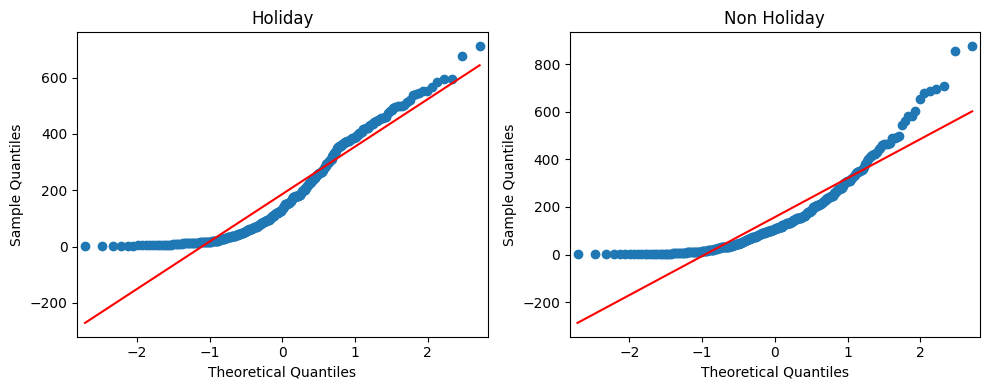

In [ ]:
plt.figure(figsize = (10, 4))

# Subplot for Holiday
ax1 = plt.subplot(1, 2, 1)
qqplot(
    holiday,
    line = "s",
    ax = ax1)
ax1.set_title("Holiday")

# Subplot for Non Holiday
ax2 = plt.subplot(1, 2, 2)
qqplot(
    non_holiday,
    line = "s",
    ax = ax2)
ax2.set_title("Non Holiday")

plt.tight_layout()
plt.show()

- Test for normality fails.

##### B. Shapiro-Wilk's Test

In [ ]:
# For Holiday

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    holiday
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8931037803842214 , P-value: 1.0929505000487749e-13
Reject null hypothesis. Data is not normally distributed.


In [ ]:
# For Non_holiday

# Ho : Data is normally distributed
# Ha : Data is not normally distributed

test_stat, p_value = shapiro(
    non_holiday
)
print("Test-stat:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Data is not normally distributed.")
else:
  print("Fail to reject null hypothesis. Data is normally distributed.")

Test-stat: 0.8312967137674818 , P-value: 2.0860625892124693e-17
Reject null hypothesis. Data is not normally distributed.


#### Assumption 2: Test for Homogeneity of Variance

##### Levene Test

In [ ]:
# Ho : Both the groups have equal variance
# Ha : Both the groups do not have equal variance

test_stat, p_value = levene(
    holiday,
    non_holiday
)
print("Test statistics:", test_stat, ", P-value:" , p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis. Both the groups do not have equal variance.")
else:
  print("Fail to reject null hypothesis. Both the groups have equal variance.")

Test statistics: 5.185378286167074 , P-value: 0.023130021944080967
Reject null hypothesis. Both the groups do not have equal variance.


- Assumption of equal variances holds true.

### Step 4: Significance Level

In [ ]:
alpha = 0.05

### Step 5: Test Statistics and P-value

In [ ]:
test_stat, p_value = ttest_ind(
    holiday,
    non_holiday,
    equal_var = True,           # Student's ttest
    alternative = "two-sided"
)

print("Test statistics:", test_stat, ", P-value:", p_value)

Test statistics: 2.1417343092733416 , P-value: 0.03261822704373544


### Step 6: Comparison

In [ ]:
if p_value < alpha:
  print(f"As the p-value ({p_value}) is less than the level of significance, we reject the null hypothesis.")
else:
  print(f"As the p-value ({p_value}) is greater than the level of significance, we fail to reject the null hypothesis.")

As the p-value (0.03261822704373544) is less than the level of significance, we reject the null hypothesis.


### **Observation:**
  - Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we can say there is no strong evidence that bike rentals differ between holiday and non holiday.